<a href="https://colab.research.google.com/github/DedeYusufK/WordCloud_for_Game_review/blob/main/Word_Cloud_of_Game's_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tm")
install.packages("SnowballC")
install.packages("wordcloud")
install.packages("RColorBrewer")
install.packages("dplyr")
install.packages("class")
install.packages("wesanderson")

In [ ]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library("dplyr")
library("class")

In [ ]:
#Manggil Data
words <- read.csv("/content/sample_data/Dataset_4.csv")

In [ ]:
#Hapus NA
word <- na.omit(words)
sum(is.na(word))
str(word$Ulasan_Diterjemahkan)

[1] 0

 chr [1:16008] "It's best working I've used" ...


In [ ]:
#Intinya persiapan buat word Cloud
word.corpus<-Corpus(VectorSource(word$Ulasan_Diterjemahkan)) #Corpus
word.corpus<-word.corpus%>%
  tm_map(removePunctuation)%>% ##eliminate punctuation
  tm_map(removeNumbers)%>% #no numbers
  tm_map(stripWhitespace)#white spaces
word.corpus <- tm_map(word.corpus, removeWords, c("the", "and","for","this","that","with","will","also","i'm"))
word.corpus<-word.corpus%>%
  tm_map(tolower)%>% ##make all words lowercase
  tm_map(removeWords, stopwords("english"))

word.corpus<-tm_map(word.corpus, stemDocument)
word.counts<-as.matrix(TermDocumentMatrix(word.corpus))
word.freq<-sort(rowSums(word.counts), decreasing=TRUE)

Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(word.corpus, removeWords, c("the", "and", :
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(word.corpus, stemDocument):
“transformation drops documents”


In [ ]:
#Cari kata terbanyak
head(word.freq)

game  get like time  app love 
4689 2533 2481 2431 2328 2178

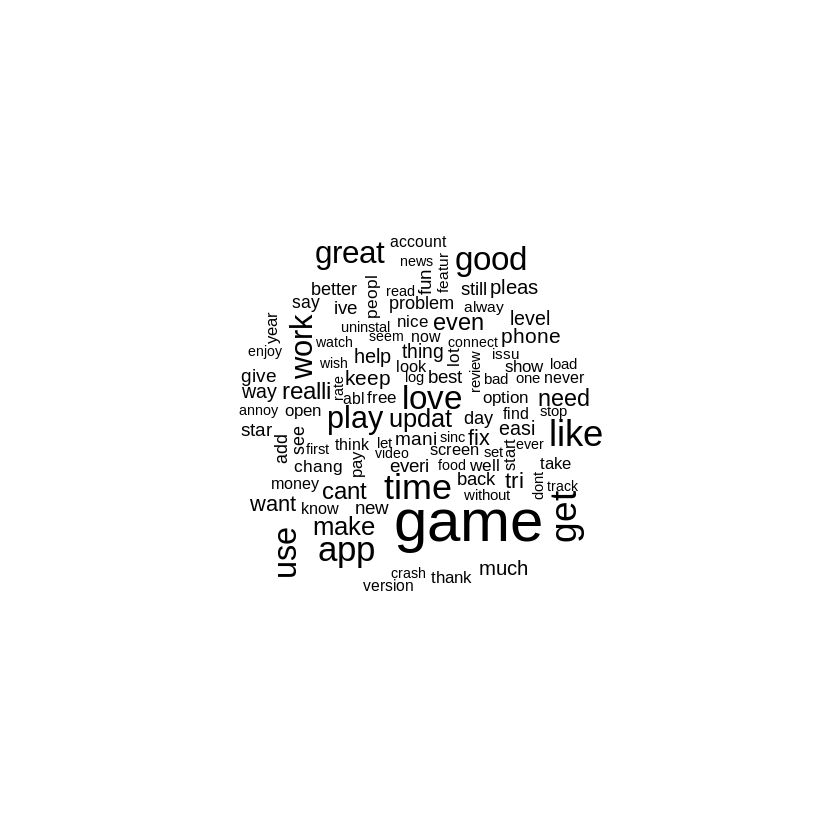

In [ ]:
#Buat nampilin Word Cloud HP
set.seed(32) #be sure to set the seed if you want to reproduce the same again

wordcloud(words=names(word.freq), freq=word.freq, scale=c(3,.5),max.words = 100, random.order = TRUE)

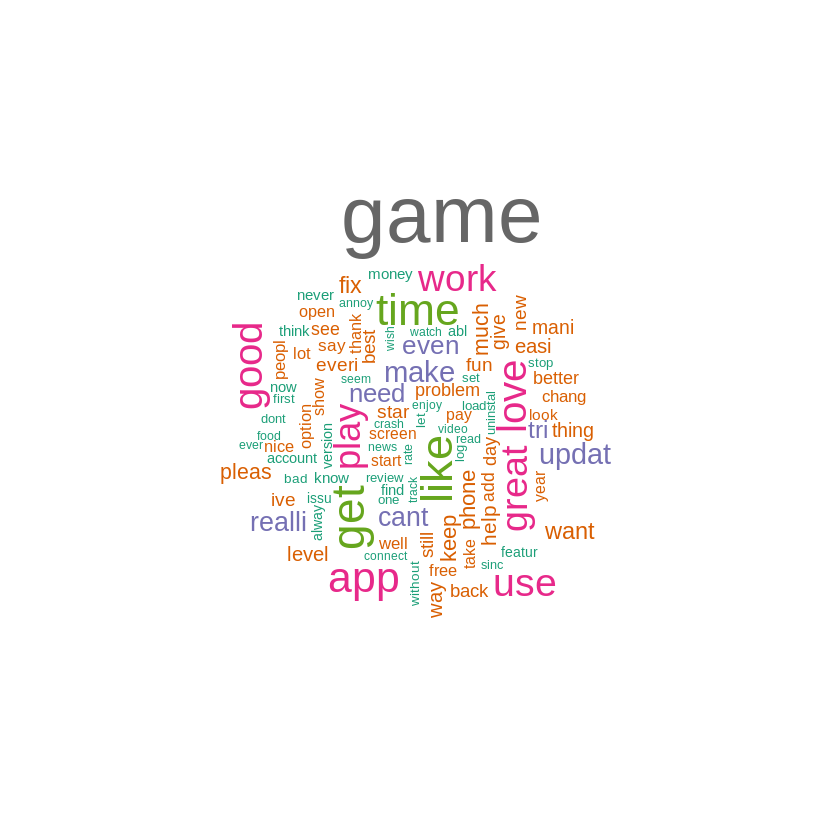

In [ ]:
#Word CLoud berwarna
wordcloud(words=names(word.freq), freq=word.freq, scale=c(4,.3),max.words = 100,
          random.order = TRUE, rot.per=0.35 ,colors=brewer.pal(8, "Dark2"))

In [ ]:
install.packages("ggplot2")
install.packages("ROSE")
install.packages("randomForest")
install.packages("e1071")
install.packages("caret")
install.packages("lattice")
install.packages("rvest")

In [ ]:
library(ggplot2)
library(dplyr)
library(ROSE)
library(randomForest)
library(e1071)
library(caret)
library(lattice)
library(wordcloud)
library(rvest)

In [ ]:
#Split Data
set.seed(1234)
index <- createDataPartition(word$Sentiment, 1, 0.8, F)

In [ ]:
#Data Train
train <- word[index,]
dim(train)

#Data Test
test <- word[-index,]
str(word$Sentiment)
dim(test)

#Cek Proporsi Data Training
table(word$Sentiment)

[1] 12807     5

 chr [1:16008] "Positive" "Positive" "Positive" "Positive" "Positive" ...


[1] 3201    5


Negative  Neutral Positive 
    3811     2230     9967 

In [ ]:
install.packages("performanceEstimation")

In [ ]:
library(performanceEstimation)



In [ ]:
as.data.frame(table(train$Sentiment))

Var1,Freq
<fct>,<int>
Negative,3049
Neutral,1784
Positive,7974


In [ ]:
#Manggil Data
wordq<- readRDS("/content/data.Rda")

In [ ]:
str(wordq)

'data.frame':	2200 obs. of  5 variables:
 $ Aplikasi              : chr  "Helix Jump" "Helix Jump" "Helix Jump" "Helix Jump" ...
 $ Ulasan_Diterjemahkan  : chr  "Actually really enjoy playing game, however I paid upgraded version without ads still continued get ads. Emaile"| __truncated__ "Update: I finally bought premium version avoid ads I'm still getting ads non stop despite reaching devs respond"| __truncated__ "Hi VOODOO I issues game I press icon everytime I try go game tablet says 'unfortunately helix jump stopped'. I "| __truncated__ "It's good game much need update. There ads die get next level. When I first started play I went straight game. "| __truncated__ ...
 $ Sentiment             : chr  "Negative" "Positive" "Positive" "Positive" ...
 $ Sentiment_Polarity    : num  -0.1425 0.2025 0.0857 0.0891 0.1239 ...
 $ Subjektivitas_Sentimen: num  0.598 0.605 0.671 0.367 0.548 ...
 - attr(*, "na.action")= 'omit' Named int [1:26762] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= 

In [ ]:
head(wordq)

,Aplikasi,Ulasan_Diterjemahkan,Sentiment,Sentiment_Polarity,Subjektivitas_Sentimen
,<chr>,<chr>,<chr>,<dbl>,<dbl>
59937,Helix Jump,"Actually really enjoy playing game, however I paid upgraded version without ads still continued get ads. Emailed developer week ago along attached confirmation purchase never got response, therefore I'm giving star. Just lot downloads mean overlook people support game; especially ones voluntarily pay upgraded version.",Negative,-0.14250000,0.5975000
59938,Helix Jump,"Update: I finally bought premium version avoid ads I'm still getting ads non stop despite reaching devs responded all. Going request refund I guess. Original review: The game fun addicting, many ads. An ad every time restart level, ad beat level, ad blink many times. I know devs make money game free pretty top",Positive,0.20250000,0.6050000
59939,Helix Jump,"Hi VOODOO I issues game I press icon everytime I try go game tablet says 'unfortunately helix jump stopped'. I honestly know game made IOS'S Android. I rated five stars u played friends iPhone really good quality. But seemed work perfectly phone tablet. can, reply comment inform happening. Thank",Positive,0.08571429,0.6714286
59940,Helix Jump,It's good game much need update. There ads die get next level. When I first started play I went straight game. When game front screen thing. Also I got level 4 phones screen went black screen come back. It's good game lot work. Keep good work!,Positive,0.08910256,0.3666667
59941,Helix Jump,I love game seems like thing again. It get harder easier. They even change colors repeat them. It's like loop level say different level. Please make challenging get higher game change maybe different color level. Other wise cool I beat like 6 levels 1 hour!,Positive,0.12386364,0.5477273
59942,Helix Jump,"Love game - really addictive, could added difficulty levels pass by. My kid plays lot too, I thought ""let's buy full version help developers"". HOWEVER, I paid NO ADDS version, BUT NOTHING CHANGED, adds continue pop usual. Because gets 2 starts :(",Negative,-0.09166667,0.6166667


In [ ]:
#Buat data Partisi (diba tin)
library(ggplot2)
library(lattice)
library(caret)




Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
set.seed(123)
index <- createDataPartition(Kode$recoded.labels, p=0.80, list = FALSE)
index

#Select 80% untuk data training
training <- Kode[index,] #data frame mau ambil elemen
dim(training)

#menggunakan 20% data tes untuk model
testing <- Kode[-index,]
dim(testing)

In [ ]:
library(caTools)


In [ ]:
install.packages("car")

In [ ]:
library(car)

In [ ]:

required.labels <- wordq["Sentiment"]


In [ ]:
recoded.labels <- recode(required.labels$Sentiment,"'Negative'=0; 'Neutral'=1; 'Positive'=2")


In [ ]:
#SVM
svm_model <- svm(recoded.labels ~., training,
                 kernel = "radial") #linier/polinom/sigmoid
svm_model


Call:
svm(formula = recoded.labels ~ ., data = training, kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.001172333 
    epsilon:  0.1 


Number of Support Vectors:  1363


In [ ]:


#Predicting on data training
pred_train= predict(svm_model, training)




In [ ]:
#Confusion Matrix
cm3 <- table(Kode$recoded.labels, pred_train)
cm3



ERROR: ignored

#Model Evalution
confusionMatrix(cm3)

